In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/'embc'/

In [ ]:
import numpy as np
import h5py
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler

In [ ]:
data = pd.read_csv(r"F:\MIB Lab\Research\Conference Papers\EMBC 2024\Anirudh\fixed_dataset.csv")
data = data.set_index('UKB ID')

#merge columns if you want
data['targ'] = data[['L730', 'L910']].sum(axis=1)
data['targ'] = data['targ'].apply(lambda x: 1 if x != 0 else x)

#UKB ID column is an identifier, not feature
features = data.drop(['L730', 'L910', 'targ'], axis=1)
targets = data[['targ']]

In [ ]:
data

,L730,L910,T20,T21,T22,T23,T24,T25,T26,T300,...,T310,T311,T312,T318,L905,W45,Y60,Y610,T813,targ
UKB ID,,,,,,,,,,,,,,,,,,,,,
2209877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1957781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4593120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2798681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2938803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3341733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4440638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features

,T20,T21,T22,T23,T24,T25,T26,T300,T301,T302,T303,T310,T311,T312,T318,L905,W45,Y60,Y610,T813
UKB ID,,,,,,,,,,,,,,,,,,,,
2209877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1957781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4593120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2798681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2938803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3341733,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4440638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# !pip install kmodes

In [ ]:
features = data[['T22', 'T301', 'Y610', 'Y60', 'W45', 'T21', 'T25', 'L905', 'T26']]
# Assuming 'binary_data' is your binary feature matrix
k_modes = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = k_modes.fit_predict(features)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7, cost: 218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7, cost: 218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7, cost: 218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7, cost: 218.0
Best run was number 1


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [ ]:
df = pd.DataFrame(data={'groups': clusters, 'scars': data['targ']})
gr = list(set(list(df['groups'])))
for i in gr:
  tes = df[df['groups'] == i]
  print(sum(tes['scars'])/len(tes))

0.10312056737588653
0.39080459770114945


In [ ]:
df = data[['T22', 'T301', 'Y610', 'Y60', 'W45', 'T21', 'T25', 'L905', 'T26', 'targ']]

from scipy.stats import chi2_contingency
def chi_test(ds,labels):
    ct = pd.crosstab(ds,labels)
    return chi2_contingency(ct)

res = df.apply(lambda x:chi_test(x,k_modes.labels_)[:-1]).T
res.columns = ["chi2","p","df"]
res.sort_values("p")

,chi2,p,df
L905,7181.520710,0.000000e+00,1.0
targ,140.572744,1.995123e-32,1.0
T22,22.062233,2.639521e-06,1.0
T21,15.674325,7.523859e-05,1.0
T25,13.904567,1.923306e-04,1.0
Y60,2.439168,1.183390e-01,1.0
T26,0.583125,4.450900e-01,1.0
T301,0.000000,1.000000e+00,1.0
Y610,0.000000,1.000000e+00,1.0
W45,0.000000,1.000000e+00,1.0


In [ ]:
df = data[['T22', 'T301', 'Y610', 'Y60', 'W45', 'T21', 'T25', 'L905', 'T26', 'targ']]
df['labels'] = k_modes.labels_

from scipy.stats import chi2_contingency
def chi_test(ds,labels):
    ct = pd.crosstab(ds,labels)
    return chi2_contingency(ct)

gr = list(set(list(df['labels'])))
for i in gr:
  tes = df[df['labels'] == i]
  labels = list(tes['targ'])
  dataset = tes.drop(['labels'], axis=1)
  res = dataset.apply(lambda x:chi_test(x,labels)[:-1]).T
  res.columns = ["chi2","p","df"]
  print(res.sort_values("p"))

             chi2         p   df
targ  7039.191782  0.000000  1.0
W45      1.945724  0.163048  1.0
T25      1.270423  0.259687  1.0
T301     0.355716  0.550895  1.0
Y60      0.355716  0.550895  1.0
T22      0.135385  0.712913  1.0
Y610     0.131040  0.717356  1.0
T21      0.032219  0.857548  1.0
L905     0.000000  1.000000  0.0
T26      0.000000  1.000000  1.0
            chi2             p   df
targ  169.825016  8.079507e-39  1.0
T21     2.067199  1.504977e-01  1.0
Y60     1.096468  2.950425e-01  1.0
T22     0.365278  5.455896e-01  1.0
T25     0.257825  6.116184e-01  1.0
T301    0.000000  1.000000e+00  0.0
Y610    0.000000  1.000000e+00  0.0
W45     0.000000  1.000000e+00  0.0
L905    0.000000  1.000000e+00  0.0
T26     0.000000  1.000000e+00  1.0


C:\Users\Andrew\AppData\Local\Temp\ipykernel_10572\807242901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = k_modes.labels_


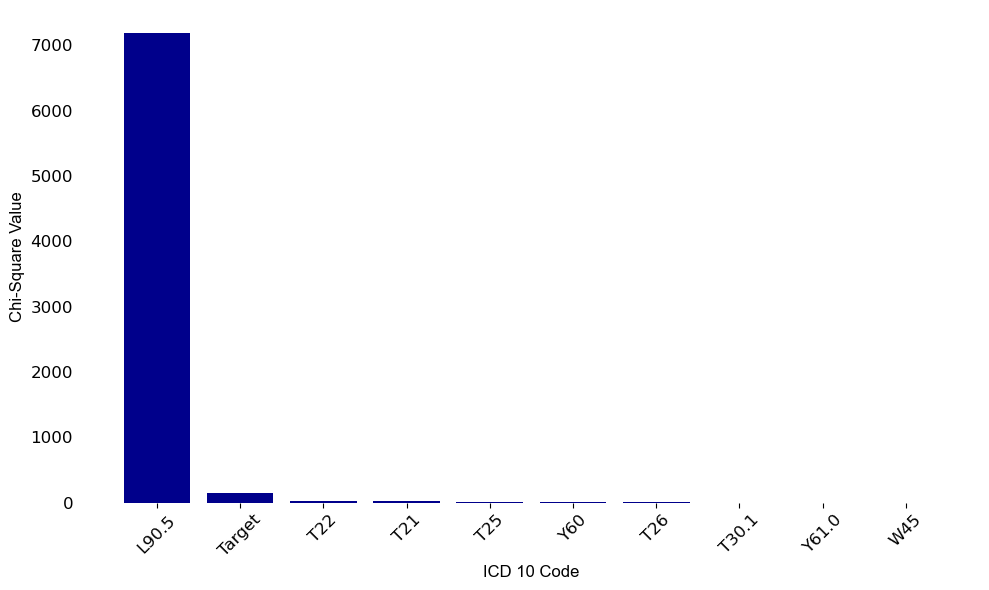

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

chi_square_data = {
    'L90.5': 7181.520710,
    'Target': 140.572744,
    'T22': 22.062233,
    'T21': 15.674325,
    'T25': 13.904567,
    'Y60': 2.439168,
    'T26': 0.583125,
    'T30.1': 0.0,
    'Y61.0': 0.0,
    'W45': 0.0
}
df_chi_square = pd.DataFrame(list(chi_square_data.items()), columns=['Variable', 'Chi-Square'])
plt.figure(figsize=(10, 6))
plt.bar(df_chi_square['Variable'], df_chi_square['Chi-Square'], color='darkblue')
#plt.title('Chi-Square Values')

#Set font
font = {'fontname': 'Arial'}
# plt.xlabel('Importance', **font, fontsize=12)
# plt.ylabel('Feature', **font, fontsize=12)

plt.xlabel('ICD 10 Code', **font, fontsize=12)
plt.ylabel('Chi-Square Value', **font, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove y-axis ticks
plt.tick_params(axis='y', which='both', left=False)

plt.savefig('bar_plot_first.png')
plt.show()

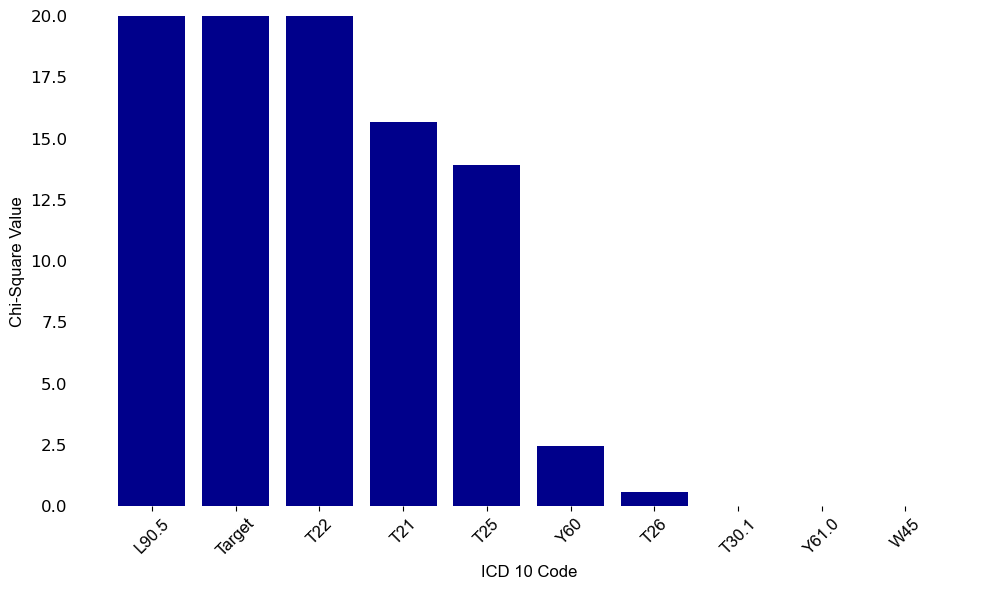

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

chi_square_data = {
    'L90.5': 7181.520710,
    'Target': 140.572744,
    'T22': 22.062233,
    'T21': 15.674325,
    'T25': 13.904567,
    'Y60': 2.439168,
    'T26': 0.583125,
    'T30.1': 0.0,
    'Y61.0': 0.0,
    'W45': 0.0
}




#Set font
font = {'fontname': 'Arial'}

df_chi_square = pd.DataFrame(list(chi_square_data.items()), columns=['Variable', 'Chi-Square'])
plt.figure(figsize=(10, 6))
plt.bar(df_chi_square['Variable'], df_chi_square['Chi-Square'], color='darkblue')
#plt.title('Chi-Square Values')
plt.xlabel('ICD 10 Code', **font, fontsize=12)
plt.ylabel('Chi-Square Value', **font, fontsize=12)
plt.xticks(**font, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 20)
plt.tight_layout()



# Remove y-axis ticks
plt.tick_params(axis='y', which='both', left=False)



####This is how you get axis borders####
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('bar_plot_total.png')
plt.show()